In [2]:
import pandas as pd

In [6]:
# 데이터 추출하기
def get_data(name, file):
    data = open(file, 'r')
    data_log = []

    for line in data:
        if len(line) > 1000:   # cir data를 갖는 line은 1016개의 데이터를 갖기에 1000개 이상의 데이터를 갖는 line만 추출
            data_log.append(line)

    print("len(data_log): ", len(data_log)) # 데이터 추출 개수 확인

    processed_data = []  # 데이터 처리를 위한 리스트

    for i in data_log:
        if any(c.isalpha() for c in i):
            index = i.find("RSMPL")  # CIR log가 생성되는 과정에서 끝부분이 RSMPL(01)로 끝나는 Line이 생성되는 경우가 있음
            # RSMPL이라는 문자를 찾지 못하면 -1을 반환
            if index != -1:
                i = i[index+len("RSMPL")+4:]  # RSMPL 다음의 4개의 문자를 제외한 데이터를 추출
                processed_data.append(i)
            else:
                # 문자열이 없는 경우 바로 추가
                processed_data.append(i)
        # 알파벳이 없는 경우 바로 추가
        else:
            processed_data.append(i)
    
    data_log = processed_data # 데이터 처리된 데이터를 data_log에 저장
    raw_data = []  # 데이터 처리를 위한 리스트
    for i in range(len(data_log)):
        data_sample = [int(x) for x in data_log[i].strip().split(",") if x]  # 데이터를 ,로 분리, int로 변환하여 list로 저장
        raw_data.append(data_sample)
    
    count = 0
    for i in range(len(raw_data)):
        if len(raw_data[i]) > 1016:
            count += 1
    
    print("not 1016: ", count)  # 1016개의 데이터를 갖지 않는 데이터 확인

    if count != 0:
        for i in range(len(raw_data)):
            if len(raw_data[i]) > 1016:
                raw_data[i] = raw_data[i][1016:]  # 1016개의 데이터를 넘는 경우 중첩된 경우이므로 후자를 선택

    count = 0
    for i in range(len(raw_data)):
        if len(raw_data[i]) != 1016:
            count += 1
    print("after: ",count)  # 잘 변경 되었는지 확인
    if count != 0:
        print("error, 잘못 처리된 데이터가 있습니다.")  # 없을거 같지만 그래도 만듦, 그래서 어딘지까지는 안 알려줌
        return

    raw_data = pd.DataFrame(raw_data)  # 데이터프레임으로 변환

    # CIR data를 절대값처리한 후 정규화한 형태로 변환
    # abs_normalized_data = raw_data.apply(lambda x: x*x, axis=1)  # 제곱 처리  
    # abs_normalized_data = abs_normalized_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)  # 정규화

    
    # abs_normalized_data.to_csv(name)
    raw_data.to_csv(name)  # 데이터 저장
    print(len(raw_data))

In [7]:
# get_data("지정하고 싶은 이름, "파일 이름")
get_data("data/R_anchor_2m_0m.csv", "20240819-203038_DecaWaveAllAccum_R_anchor_2m_0m.log")
get_data("data/R_anchor_2m_1_5m.csv", "20240819-210400_DecaWaveAllAccum_R_anchor_2m_1_5m.log")
get_data("data/R_tag_2m_0m.csv", "20240819-204659_DecaWaveAllAccum_R_tag_2m_0m.log")
get_data("data/R_tag_2m_1_5m.csv", "20240819-205521_DecaWaveAllAccum_R_tag_2m_1_5m.log")
get_data("data/L_anchor_2m_0m.csv", "20240819-211414_DecaWaveAllAccum_L_anchor_2m_0m.log")
get_data("data/L_anchor_2m_1_5m.csv", "20240819-213245_DecaWaveAllAccum_L_anchor_2m_1_5m.log")
get_data("data/L_tag_2m_0m.csv", "20240819-212655_DecaWaveAllAccum_L_tag_2m_0m.log")
get_data("data/L_tag_2m_1_5m.csv", "20240819-213858_DecaWaveAllAccum_L_tag_2m_1_5m.log")
get_data("data/ground_truth.csv", "20240819-214752_DecaWaveAllAccum_empty.log")

len(data_log):  583
not 1016:  3
after:  0
583
len(data_log):  803
not 1016:  9
after:  0
803
len(data_log):  634
not 1016:  3
after:  0
634
len(data_log):  783
not 1016:  3
after:  0
783
len(data_log):  799
not 1016:  6
after:  0
799
len(data_log):  686
not 1016:  12
after:  0
686
len(data_log):  630
not 1016:  10
after:  0
630
len(data_log):  648
not 1016:  3
after:  0
648
len(data_log):  709
not 1016:  10
after:  0
709


In [8]:
ra20 = pd.read_csv("data/R_anchor_2m_0m.csv", index_col=0)
ra215 = pd.read_csv("data/R_anchor_2m_1_5m.csv", index_col=0)
rt20 = pd.read_csv("data/R_tag_2m_0m.csv", index_col=0)
rt215 = pd.read_csv("data/R_tag_2m_1_5m.csv", index_col=0)
la20 = pd.read_csv("data/L_anchor_2m_0m.csv", index_col=0)
la215 = pd.read_csv("data/L_anchor_2m_1_5m.csv", index_col=0)
lt20 = pd.read_csv("data/L_tag_2m_0m.csv", index_col=0)
lt215 = pd.read_csv("data/L_tag_2m_1_5m.csv", index_col=0)
empty = pd.read_csv("data/ground_truth.csv", index_col=0)

In [59]:
print("ra20: ", ra20.shape)
print("ra215: ", ra215.shape)
print("rt20: ", rt20.shape)
print("rt215: ", rt215.shape)
print("la20: ", la20.shape)
print("la215: ", la215.shape)
print("lt20: ", lt20.shape)
print("lt215: ", lt215.shape)
print("empty: ", empty.shape)

ra20:  (543, 1016)
ra215:  (763, 1016)
rt20:  (594, 1016)
rt215:  (743, 1016)
la20:  (759, 1016)
la215:  (646, 1016)
lt20:  (590, 1016)
lt215:  (608, 1016)
empty:  (669, 1016)


In [10]:
ra20 = ra20[20:-20]
ra215 = ra215[20:-20]
rt20 = rt20[20:-20]
rt215 = rt215[20:-20]
la20 = la20[20:-20]
la215 = la215[20:-20]
lt20 = lt20[20:-20]
lt215 = lt215[20:-20]
empty = empty[20:-20]

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
ra20.iloc[0][740:780]

740       28
741      120
742      -41
743       -7
744      195
745       21
746      108
747      -87
748     -124
749    -2275
750    -9449
751   -16437
752   -11111
753     3483
754    10349
755     4182
756    -2410
757    -1865
758      827
759     -100
760    -2585
761    -2705
762     -141
763     1593
764      985
765      114
766     -489
767     -836
768    -1595
769    -1277
770      211
771     1653
772     1450
773     -901
774    -2538
775    -1772
776     -530
777     -968
778    -1584
779      -68
Name: 20, dtype: int64

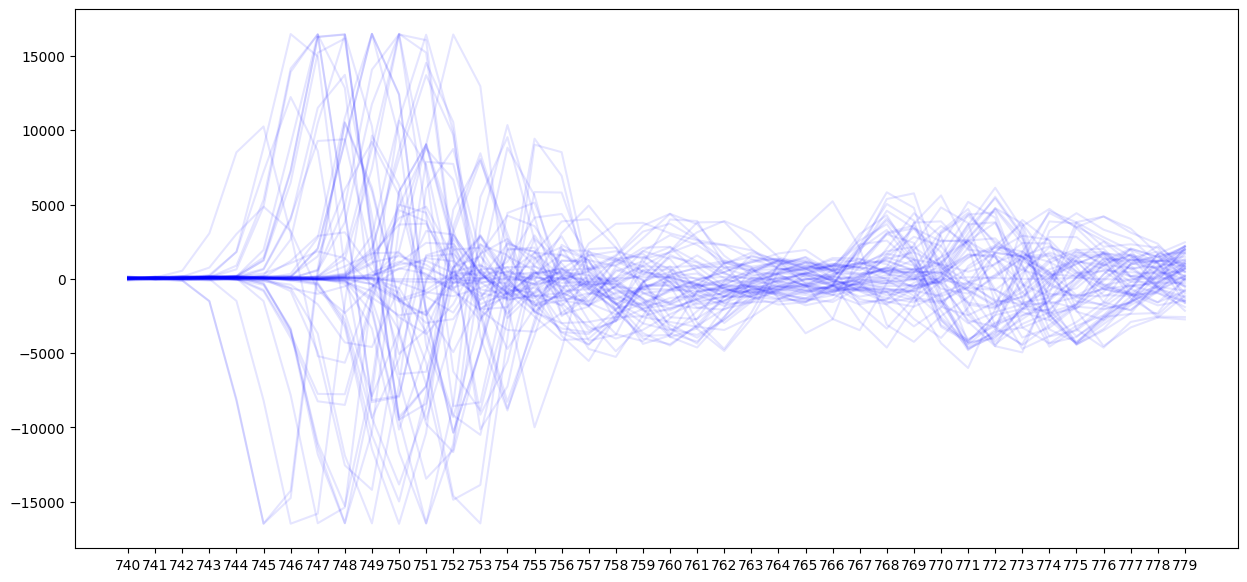

In [50]:
plt.figure(figsize=(15, 7))
k = 64
for i in range(k):
    plt.plot(ra20.iloc[i][740:780], color='blue', alpha=0.1, label="ra20")
plt.show()

In [68]:
def find_peak(data):
    for i in range(len(data)):
        if data[i] > 500:
            return i

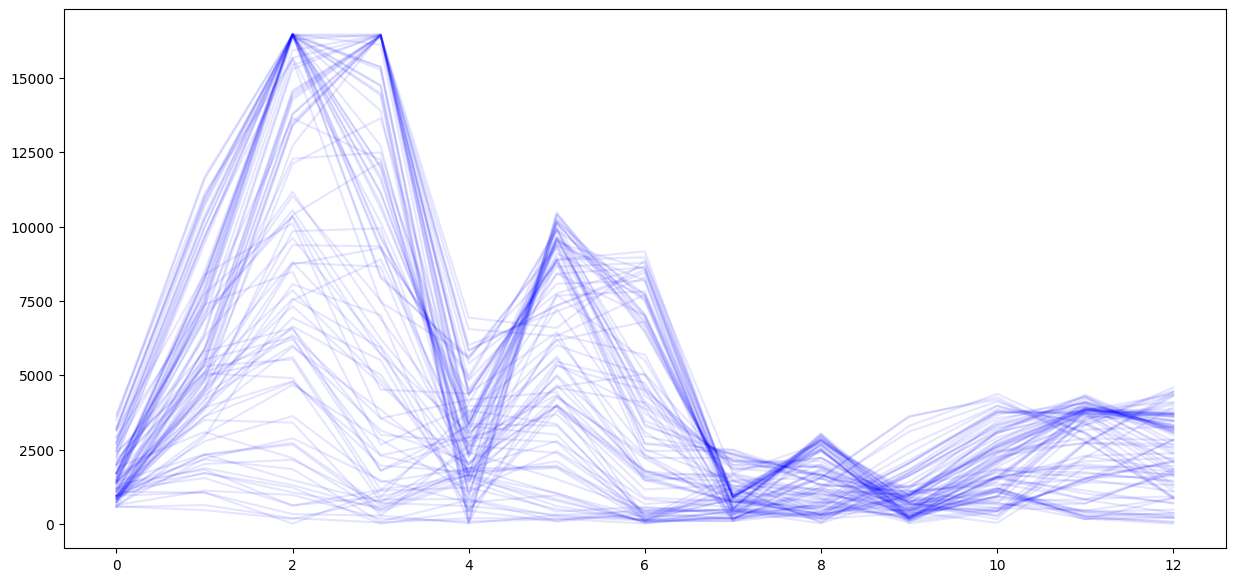

In [78]:
k = 100
plt.figure(figsize=(15, 7))
for i in range(k):
    data_sample = empty.iloc[i]
    data_sample = [abs(x) for x in data_sample]
    peak = find_peak(data_sample)
    peak_same_sample = data_sample[peak-10:peak+30]
    plt.plot(peak_same_sample[10:23], color='blue', alpha=0.1, label="empty")

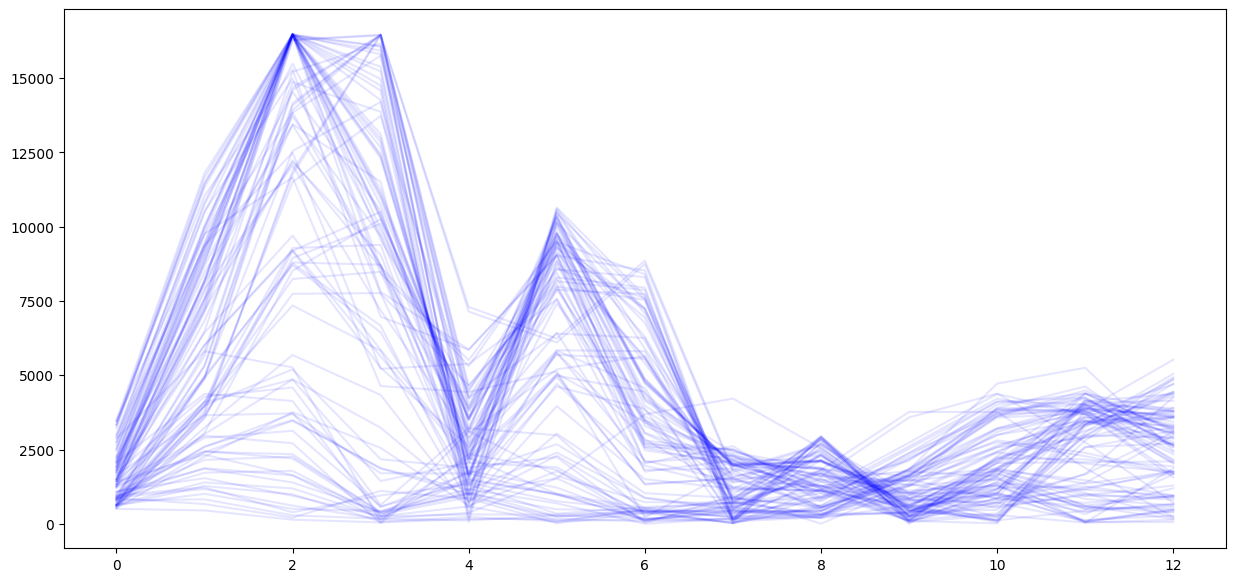

In [79]:
k = 100
plt.figure(figsize=(15, 7))
for i in range(k):
    data_sample = ra20.iloc[i]
    data_sample = [abs(x) for x in data_sample]
    peak = find_peak(data_sample)
    peak_same_sample = data_sample[peak-10:peak+30]
    plt.plot(peak_same_sample[10:23], color='blue', alpha=0.1, label="ra20")

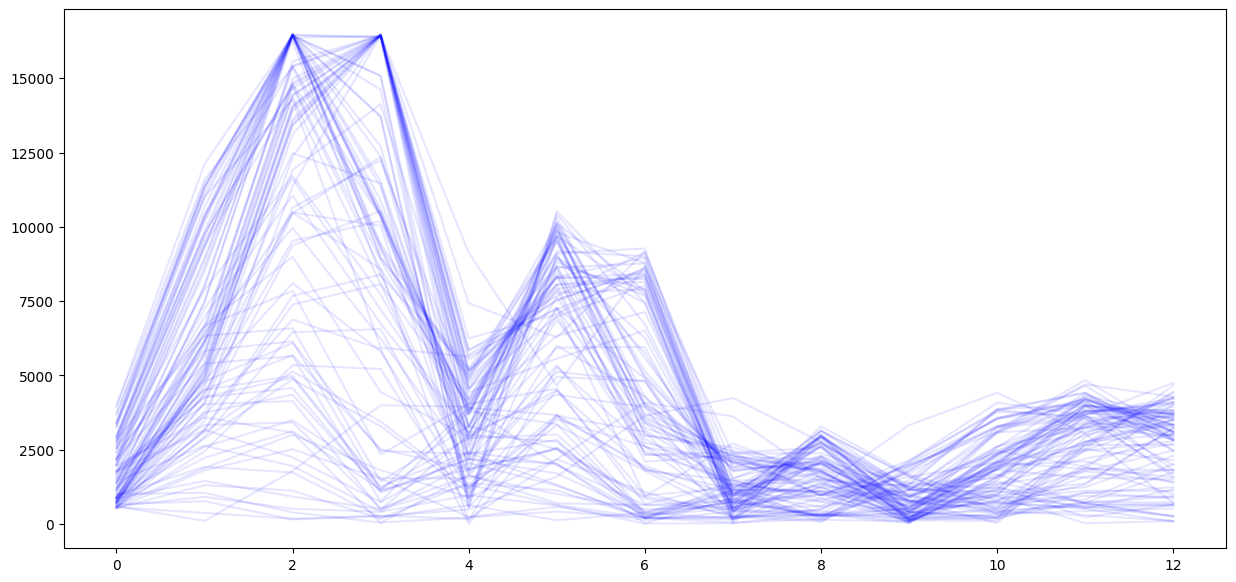

In [80]:
k = 100
plt.figure(figsize=(15, 7))
for i in range(k):
    data_sample = rt20.iloc[i]
    data_sample = [abs(x) for x in data_sample]
    peak = find_peak(data_sample)
    peak_same_sample = data_sample[peak-10:peak+30]
    plt.plot(peak_same_sample[10:23], color='blue', alpha=0.1, label="ra20")